<a href="https://colab.research.google.com/github/P-Karthikeya512/Basics-of-Pytorch/blob/main/TV_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
import os
os.getcwd()
advertising = pd.read_csv("/tvmarketing.csv")
advertising.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


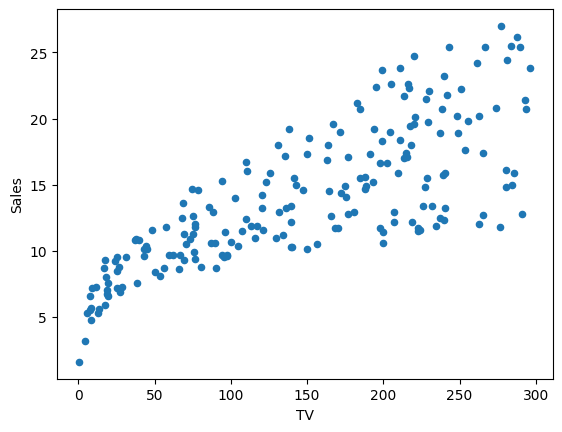

In [17]:
advertising.plot(x="TV", y="Sales", kind="scatter")
plt.show()


In [32]:
X = torch.tensor(advertising["TV"].values, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(advertising["Sales"].values, dtype=torch.float32).view(-1, 1)
X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

In [33]:
train_size = int(0.9 * len(X))

X_train = X[:train_size]
Y_train = Y[:train_size]

X_test = X[train_size:]
Y_test = Y[train_size:]

In [41]:
## first we have to normalize the data and then divide it into test and train acc to 9:1 ratio
## then declare a class model after that define criteria for loss calculation and optimizer to handle learning rate

In [34]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1,1)
  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

model = Model()

In [35]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.00001)

/usr/local/lib/python3.12/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [42]:
## now train the model with the training data for each epoch calculate loss through the criteria and do backward prop with optimizer

In [37]:
for epoch in range(1000):
  y_pred = model(X_train)
  loss = criterion(y_pred, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"epoch: {epoch}, loss: {loss.item()}")

epoch: 0, loss: 68.39813232421875
epoch: 1, loss: 68.39683532714844
epoch: 2, loss: 68.39554595947266
epoch: 3, loss: 68.3942642211914
epoch: 4, loss: 68.39299774169922
epoch: 5, loss: 68.39173889160156
epoch: 6, loss: 68.3904800415039
epoch: 7, loss: 68.38923645019531
epoch: 8, loss: 68.38800048828125
epoch: 9, loss: 68.38676452636719
epoch: 10, loss: 68.38555908203125
epoch: 11, loss: 68.38434600830078
epoch: 12, loss: 68.38314056396484
epoch: 13, loss: 68.38195037841797
epoch: 14, loss: 68.38077545166016
epoch: 15, loss: 68.37959289550781
epoch: 16, loss: 68.37843322753906
epoch: 17, loss: 68.37726593017578
epoch: 18, loss: 68.3761215209961
epoch: 19, loss: 68.3749771118164
epoch: 20, loss: 68.37384033203125
epoch: 21, loss: 68.37271881103516
epoch: 22, loss: 68.3716049194336
epoch: 23, loss: 68.37049102783203
epoch: 24, loss: 68.369384765625
epoch: 25, loss: 68.3682861328125
epoch: 26, loss: 68.36720275878906
epoch: 27, loss: 68.36611938476562
epoch: 28, loss: 68.36505126953125
epo

In [ ]:
## now evaluate the model with no grad descent as it might effect the final outcome

In [39]:
model.eval()
with torch.no_grad():
  y_pred = model(X_test)
  loss = criterion(y_pred, Y_test)
  print(f"loss: {loss}")

loss: 9.058645248413086
